In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

import warnings
warnings.filterwarnings('ignore')

In [106]:
import kagglehub 
from pathlib import Path
dataset_path = kagglehub.dataset_download("chaozhuang/steel-fatigue-strength-prediction")

dataset_path = Path(dataset_path)

df = pd.read_csv(dataset_path / "data.csv")
df.drop(columns="Sl. No.", inplace=True)

df.head()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,885,30,0,0,30,0.0,30.0,0.0,30,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NT        437 non-null    int64  
 1   THT       437 non-null    int64  
 2   THt       437 non-null    int64  
 3   THQCr     437 non-null    int64  
 4   CT        437 non-null    int64  
 5   Ct        437 non-null    float64
 6   DT        437 non-null    float64
 7   Dt        437 non-null    float64
 8   QmT       437 non-null    int64  
 9   TT        437 non-null    int64  
 10  Tt        437 non-null    int64  
 11  TCr       437 non-null    float64
 12  C         437 non-null    float64
 13  Si        437 non-null    float64
 14  Mn        437 non-null    float64
 15  P         437 non-null    float64
 16  S         437 non-null    float64
 17  Ni        437 non-null    float64
 18  Cr        437 non-null    float64
 19  Cu        437 non-null    float64
 20  Mo        437 non-null    float6

In [108]:
df.describe()

,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,TT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
count,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,...,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000,437.000000
mean,872.299771,737.643021,25.949657,10.654462,128.855835,40.502059,123.699844,4.843936,35.491991,536.842105,...,0.014611,0.517048,0.570458,0.067780,0.069794,923.629291,0.047181,0.003391,0.007712,552.903890
std,26.212073,280.036541,10.263824,7.841437,281.743539,126.924697,267.128933,15.700076,19.419277,164.101963,...,0.006145,0.852976,0.411769,0.049161,0.088124,576.617020,0.031093,0.008240,0.010418,186.630528
min,825.000000,30.000000,0.000000,0.000000,30.000000,0.000000,30.000000,0.000000,30.000000,30.000000,...,0.003000,0.010000,0.010000,0.010000,0.000000,240.000000,0.000000,0.000000,0.000000,225.000000
25%,865.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,550.000000,...,0.010000,0.020000,0.120000,0.020000,0.000000,590.000000,0.020000,0.000000,0.000000,448.000000
50%,870.000000,845.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,600.000000,...,0.015000,0.060000,0.710000,0.060000,0.000000,740.000000,0.040000,0.000000,0.000000,505.000000
75%,870.000000,855.000000,30.000000,8.000000,30.000000,0.000000,30.000000,0.000000,30.000000,650.000000,...,0.019000,0.460000,0.980000,0.100000,0.170000,1228.000000,0.070000,0.000000,0.010000,578.000000
max,930.000000,865.000000,30.000000,24.000000,930.000000,540.000000,903.333000,70.200000,140.000000,680.000000,...,0.030000,2.780000,1.170000,0.260000,0.240000,5530.000000,0.130000,0.050000,0.058000,1190.000000


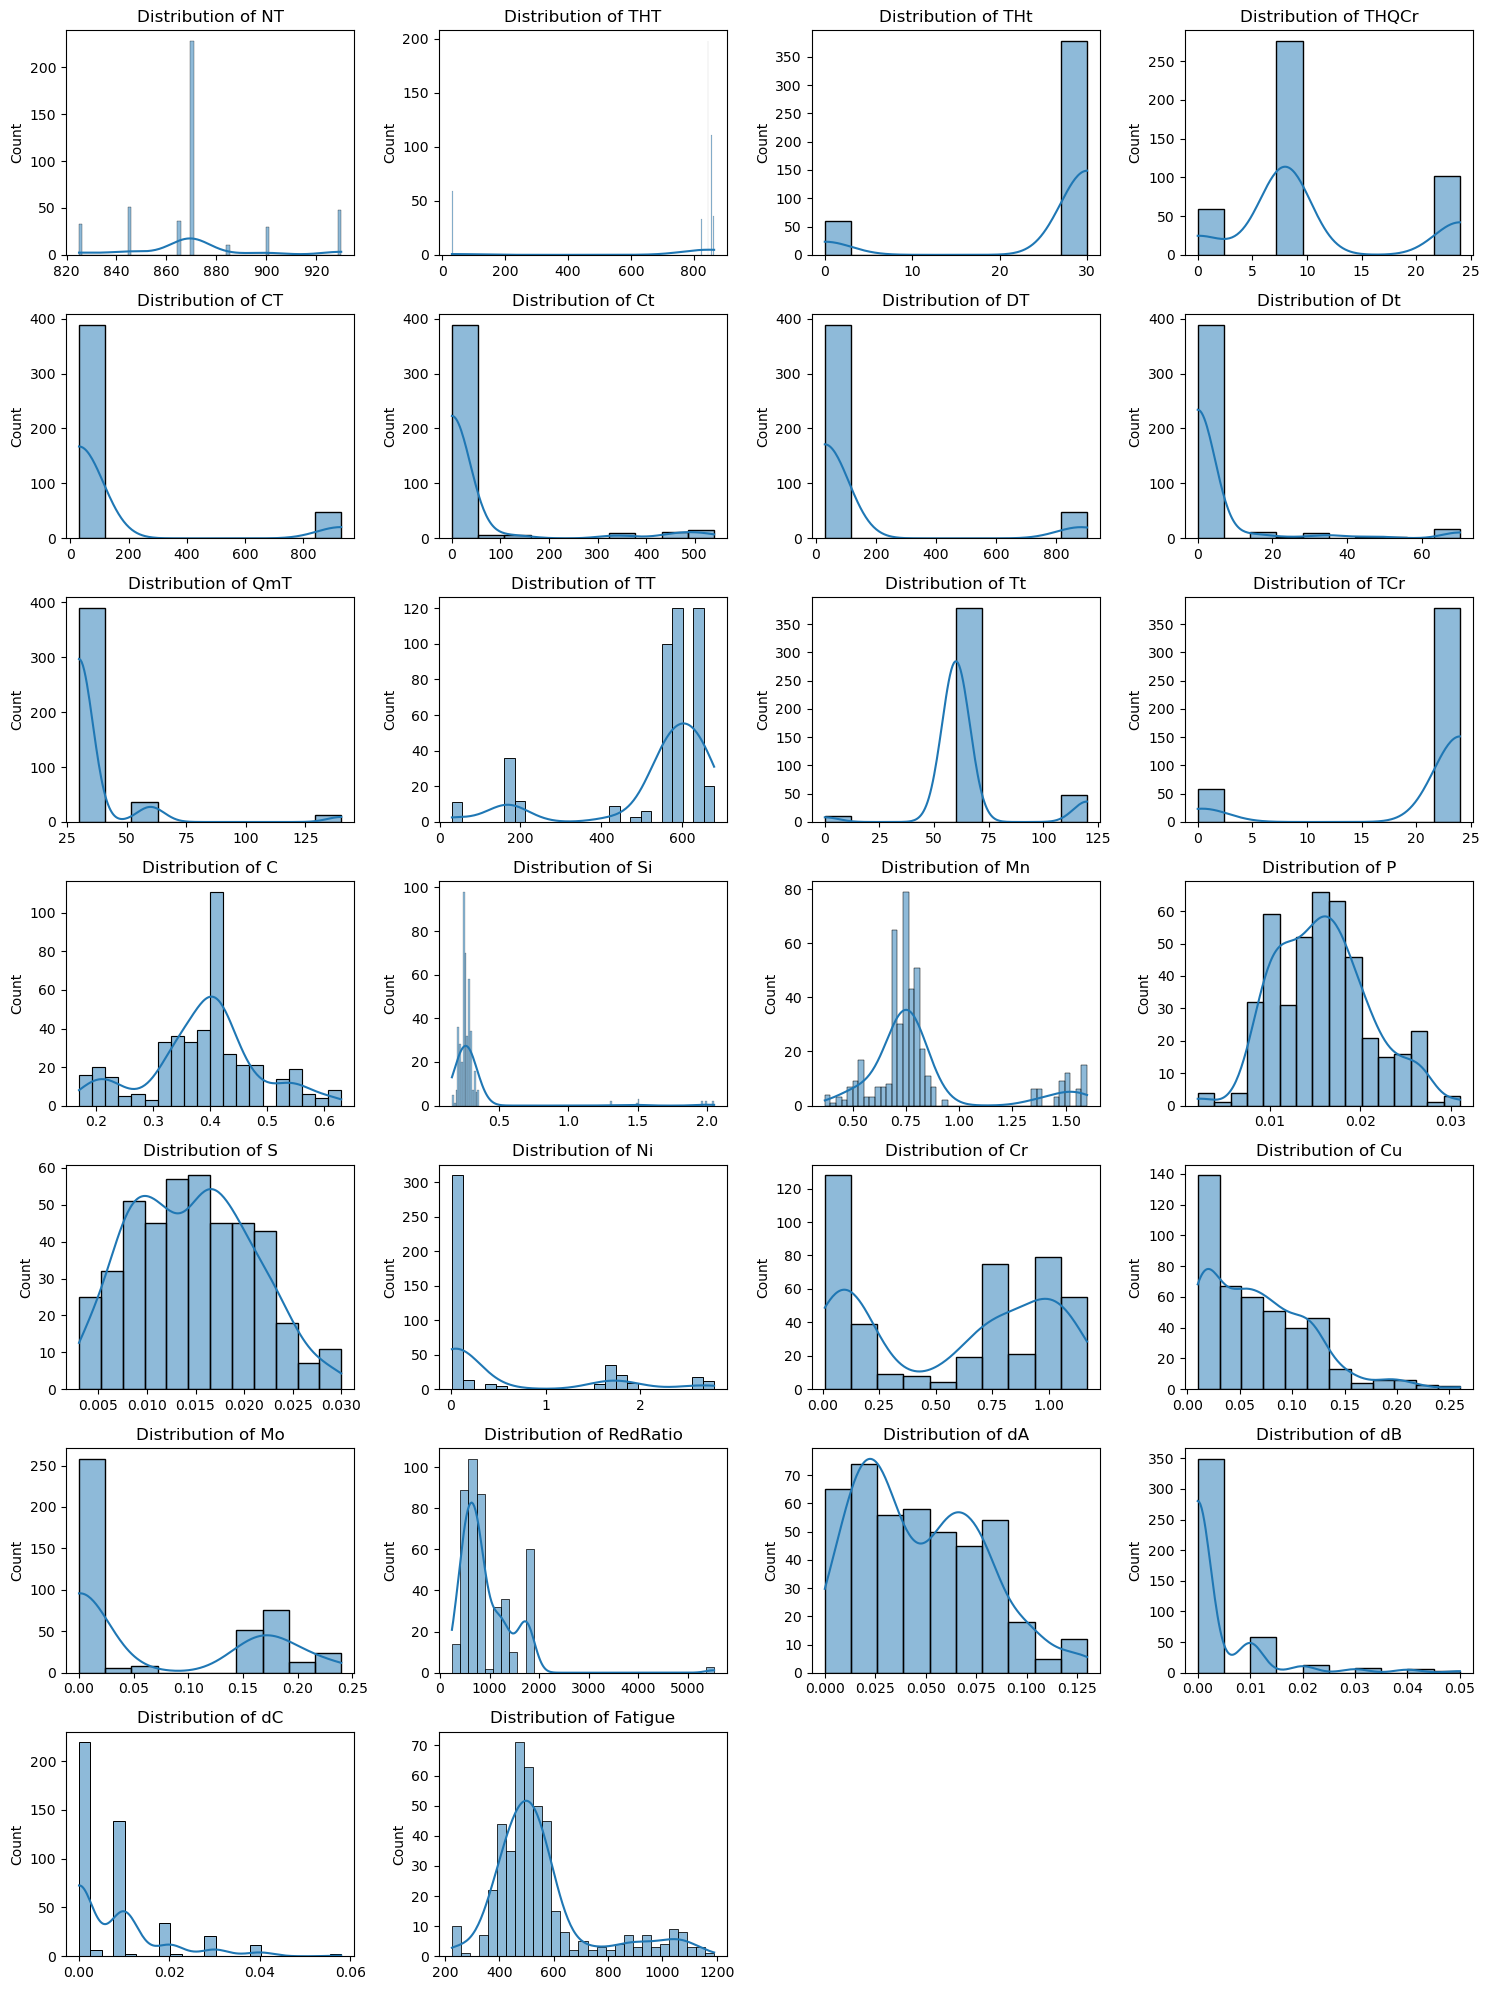

In [109]:
num_cols = df.columns
n_col = 4

n_rows = int(np.ceil(len(num_cols) / n_col))

fig, axes = plt.subplots(n_rows, n_col, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

    
plt.tight_layout()
plt.show()    


<Axes: >

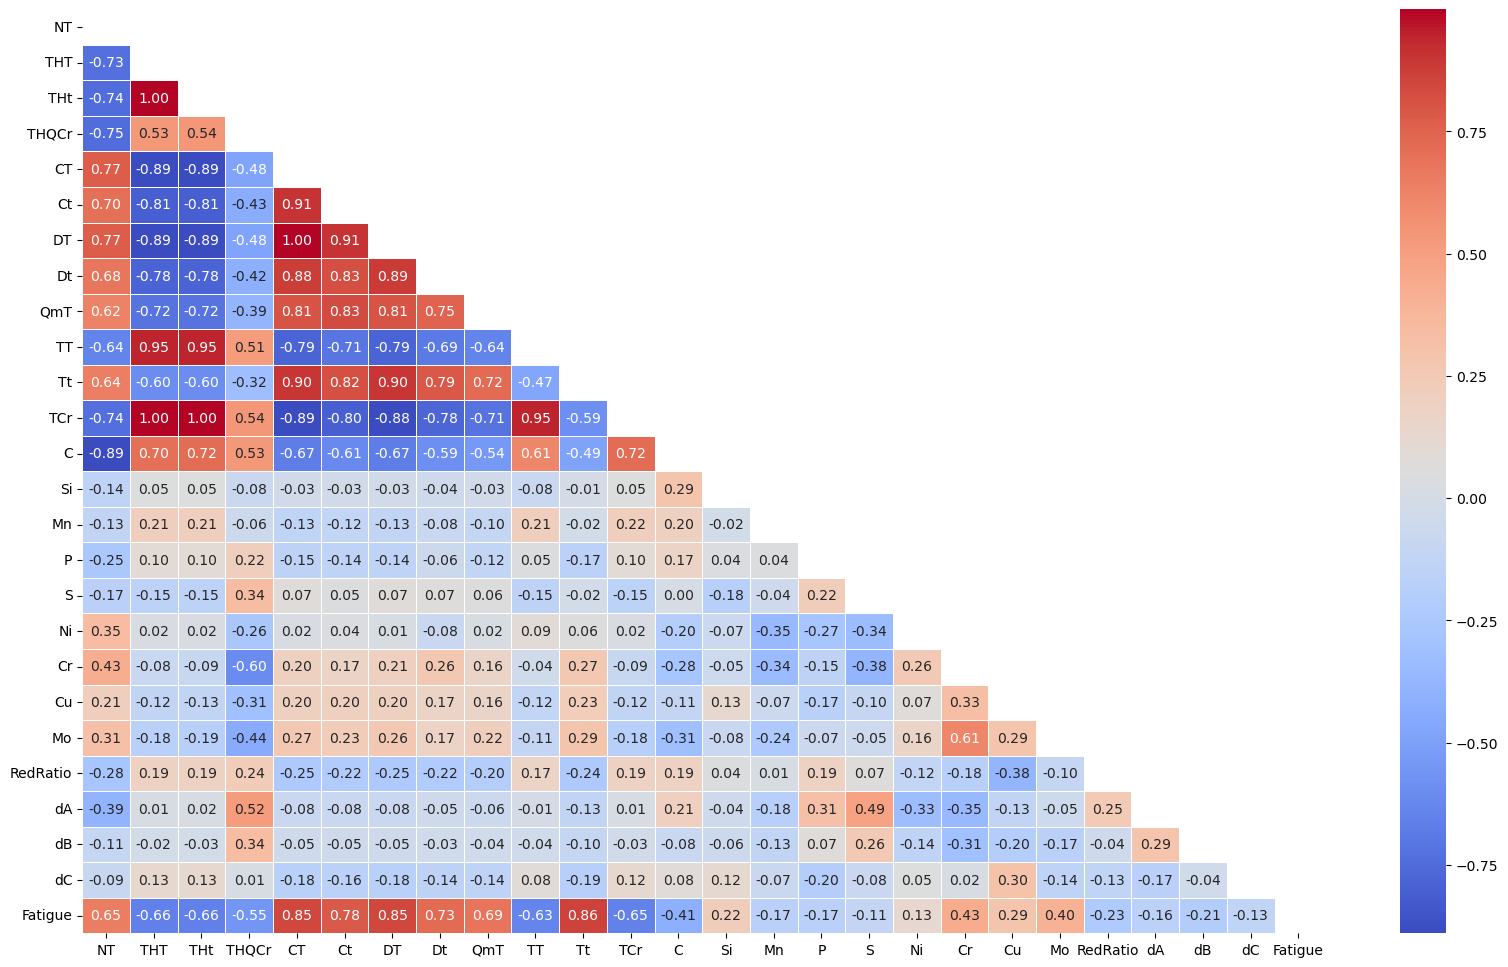

In [110]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20, 12))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linewidths=.5, cmap='coolwarm')

In [111]:
df.corr()['Fatigue'].sort_values(ascending=False)


Fatigue     1.000000
Tt          0.860337
CT          0.850296
DT          0.848612
Ct          0.778942
Dt          0.726105
QmT         0.687954
NT          0.649459
Cr          0.434295
Mo          0.403535
Cu          0.290846
Si          0.219652
Ni          0.133732
S          -0.109343
dC         -0.134093
dA         -0.161058
Mn         -0.167310
P          -0.172063
dB         -0.205290
RedRatio   -0.227418
C          -0.412313
THQCr      -0.553098
TT         -0.634550
TCr        -0.650692
THt        -0.655897
THT        -0.656615
Name: Fatigue, dtype: float64

A strong correlation between the heat treatment parameters and fatigue strrength is found; it can be interpreted that higher carburizing (CT) and tempering (TT) temperatures or longer diffusion times (DT) tend to increase case hardness and residual compressive stress, hence improving fatigue strength.
On the other hand, THT, and THTt show strongly negative correlations with fatigue strength.

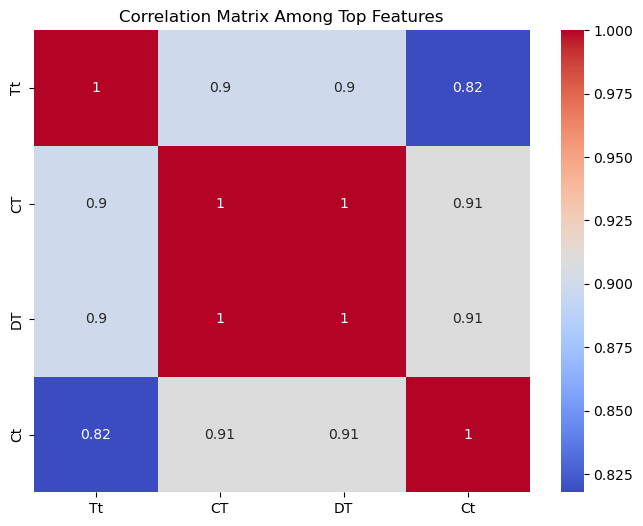

In [112]:
top_features = ['Tt', 'CT', 'DT', 'Ct']
corr_matrix = df[top_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Among Top Features')
plt.show()

As ['Tt', 'CT', 'DT', 'Ct'] are highly correlated, we only choose one variable here for the subsequent violin plot, together with other features representing composition (Cr), diffusion time (Dt), reduction ratio (RedRatio) and area features (dA, dB, dC).

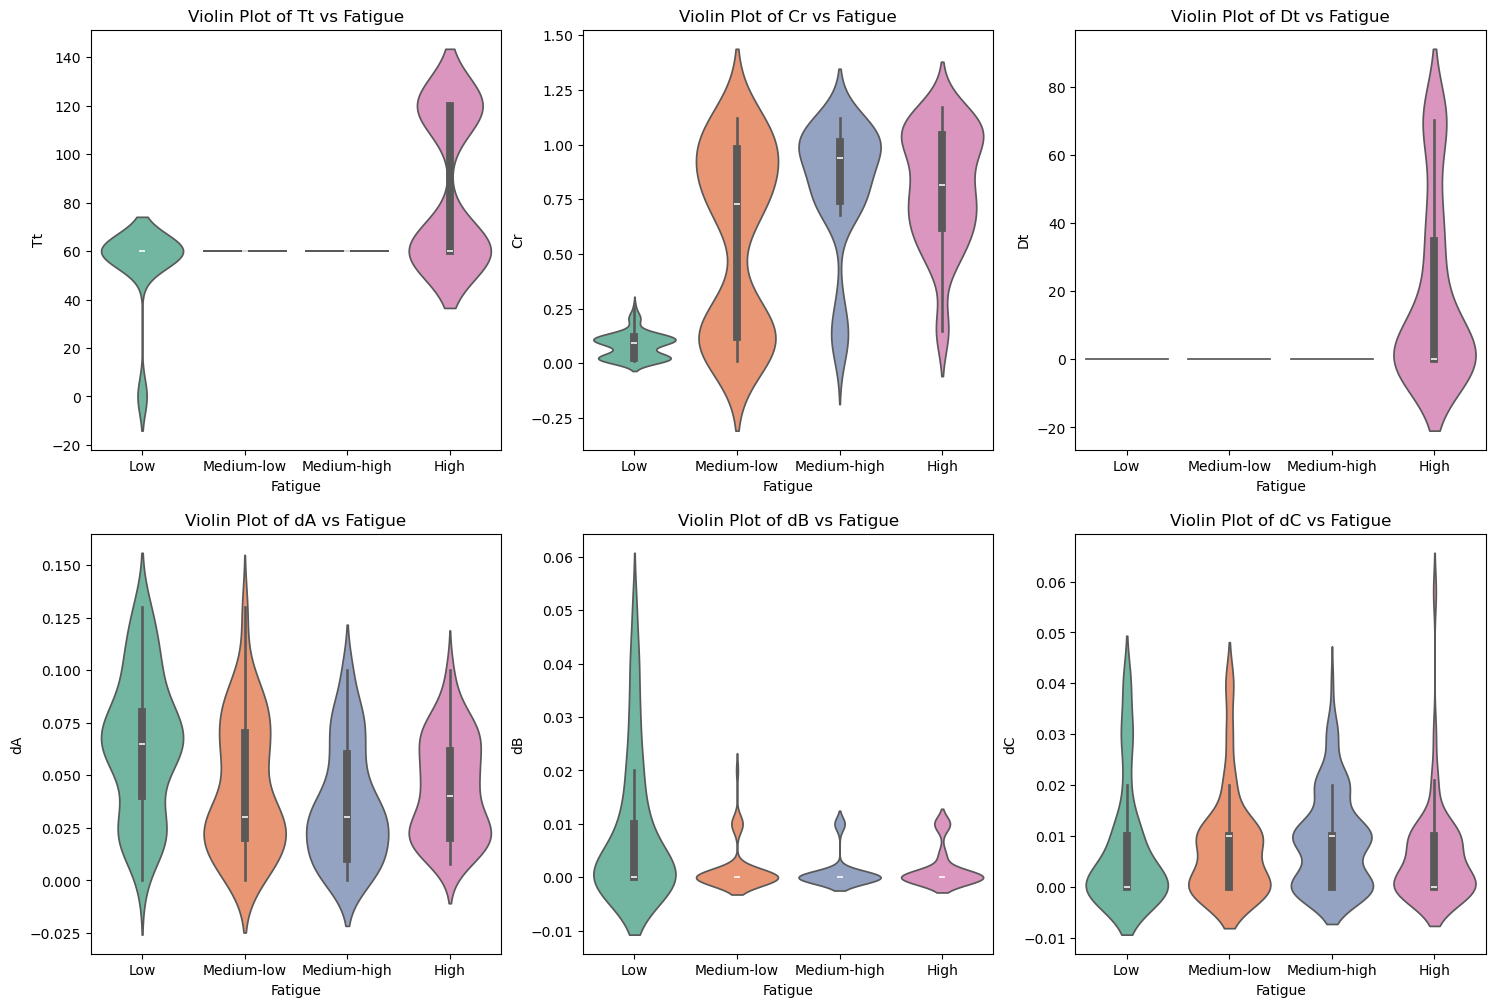

<Figure size 1500x1000 with 0 Axes>

In [113]:
RepFeatures = ['Tt', 'Cr', 'Dt', 'dA', 'dB', 'dC']

df['Fatigue_bin'] = pd.qcut(df['Fatigue'], q=4, labels=['Low', 'Medium-low', 'Medium-high', 'High'])


fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
plt.figure(figsize=(15, 10))

for ax, param in zip(axes, RepFeatures):
    sns.violinplot(data=df, x='Fatigue_bin', y=param, inner='box', palette='Set2', hue='Fatigue_bin', ax=ax)
    ax.set_title(f'Violin Plot of {param} vs Fatigue')
    ax.set_xlabel('Fatigue')
    ax.set_ylabel(param)
    
plt.tight_layout()
plt.show()




Build model pipeline, use K-fold cross validation and hyper parameter optimization

In [115]:
models = {
    'lr' : LinearRegression(),
    'rf' : RandomForestRegressor(),
    'gb' : GradientBoostingRegressor()}

X = df.drop(['Fatigue', 'Fatigue_bin'], axis=1)
y = df['Fatigue']

cv = KFold(n_splits=5, shuffle=True, random_state=42)

param_grids = {
    'lr': {},  
    'rf': {
        'model__n_estimators': [400, 800],
        'model__max_depth': [None, 16],
        'model__max_features': ['sqrt', 0.6],
        'model__min_samples_leaf': [1, 3]},
    'gb': {
        'model__learning_rate': [0.1, 0.05, 0.03],
        'model__n_estimators': [300, 600, 1000],
        'model__max_depth': [3, 4],
        'model__subsample': [1.0, 0.8]}}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)])
    if param_grids[name]:
        gs = GridSearchCV(pipe, param_grids[name],
                              cv=cv, scoring='r2', n_jobs=-1, verbose=0)
        gs.fit(X, y)
        best_model = gs.best_estimator_
        best_params = gs.best_params_
        scores = cross_val_score(best_model, X, y, cv=cv, scoring='r2', n_jobs=-1)
        results[name] = {
            'mean_r2': scores.mean(),
            'std_r2': scores.std(),
            'best_params': best_params,
            'pipe': best_model}
    else:
        pipe.fit(X, y)
        scores = cross_val_score(pipe, X, y, cv=cv, scoring='r2', n_jobs=-1)
        results[name] = {
            'mean_r2': scores.mean(),
            'std_r2': scores.std(),
            'best_params': None,
            'pipe': pipe 
        }

for name, info in results.items():
    mean_r2 = info['mean_r2']; std_r2 = info['std_r2']; params = info['best_params']
    print(f"{name:3s}  R²: {mean_r2:.3f} ± {std_r2:.3f}")
    if params is not None:
        print(f"     best params: {params}")
    



lr   R²: 0.964 ± 0.012
rf   R²: 0.980 ± 0.005
     best params: {'model__max_depth': None, 'model__max_features': 0.6, 'model__min_samples_leaf': 1, 'model__n_estimators': 800}
gb   R²: 0.983 ± 0.004
     best params: {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__n_estimators': 300, 'model__subsample': 0.8}


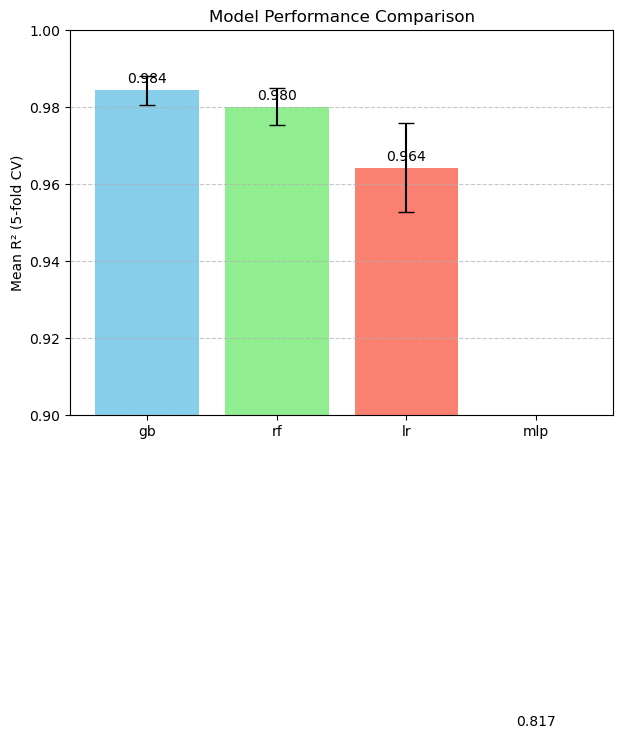

In [88]:
results_df = pd.DataFrame(results).T
results_df = results_df[['mean_r2', 'std_r2', 'best_params']].sort_values(by='mean_r2', ascending=False)
results_df = results_df.rename(columns={'mean_r2': 'Mean R²', 'std_r2': 'Std R²'})

plt.figure(figsize=(7, 5))
plt.bar(results_df.index, results_df['Mean R²'],
        yerr=results_df['Std R²'], capsize=6, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Mean R² (5-fold CV)')
plt.title('Model Performance Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0.9, 1.0)
for i, v in enumerate(results_df['Mean R²']):
    plt.text(i, v + 0.002, f"{v:.3f}", ha='center', fontsize=10)
plt.show()

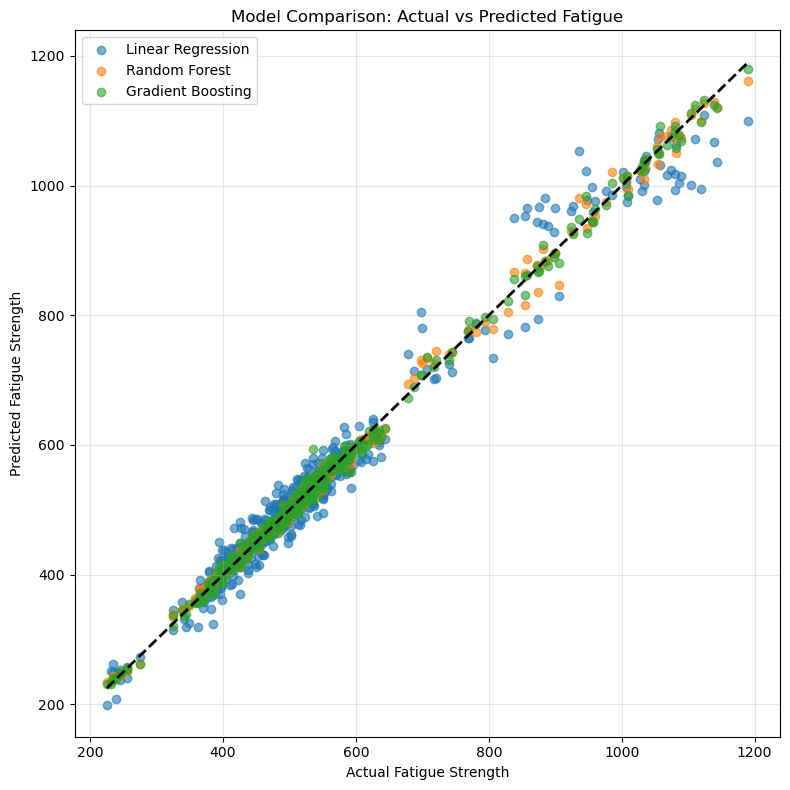

In [89]:
plt.figure(figsize=(8, 8))
plt.scatter(y, results['lr']['pipe'].predict(X), alpha=0.6, label='Linear Regression')
plt.scatter(y, results['rf']['pipe'].predict(X), alpha=0.6, label='Random Forest')
plt.scatter(y, results['gb']['pipe'].predict(X), alpha=0.6, label='Gradient Boosting')

# Reference line (perfect prediction)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)

plt.xlabel("Actual Fatigue Strength")
plt.ylabel("Predicted Fatigue Strength")
plt.title("Model Comparison: Actual vs Predicted Fatigue")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Feature importance

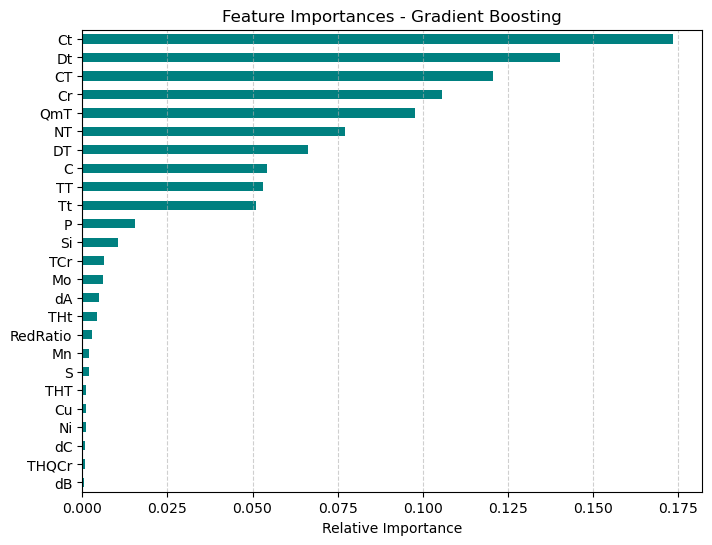

In [90]:
best_gb_params = results['gb']['best_params']
pipe_best_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(**{k.replace('model__',''): v for k,v in best_gb_params.items()}))
])

pipe_best_gb.fit(X, y)

importances = pipe_best_gb.named_steps['model'].feature_importances_
importances_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
importances_series.plot(kind='barh', color='teal')
plt.title('Feature Importances - Gradient Boosting')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


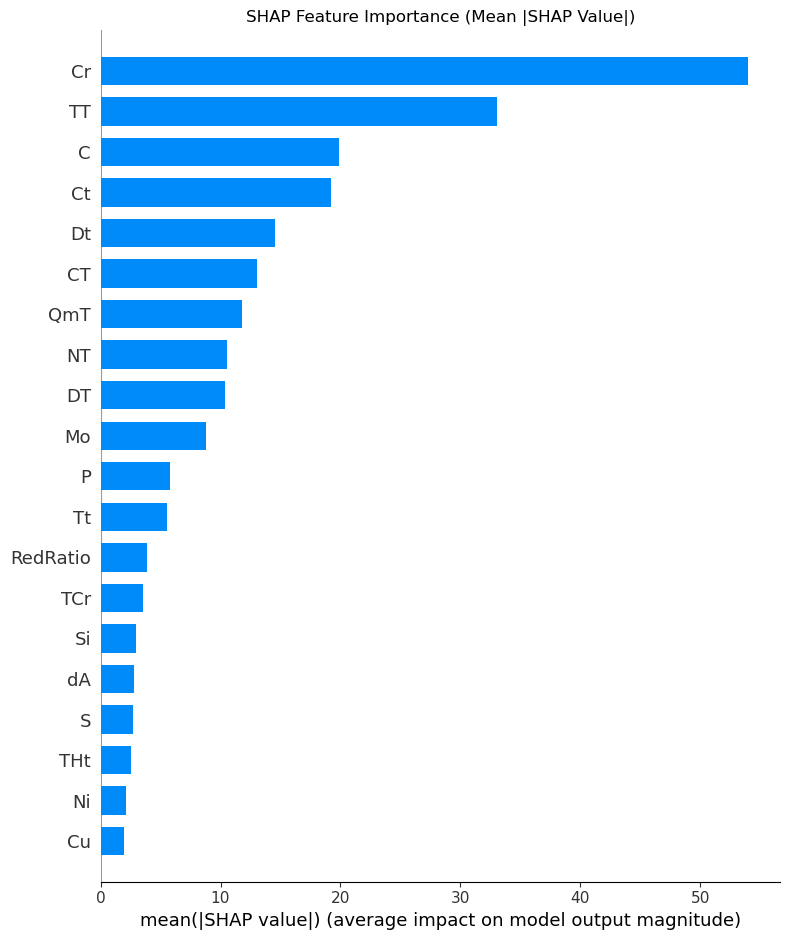

In [91]:
import shap

# Initialize explainer
model = pipe_best_gb.named_steps['model']
scaler = pipe_best_gb.named_steps['scaler']
X_scaled = scaler.transform(X)

explainer = shap.Explainer(model, X_scaled)
shap_values = explainer(X_scaled)

shap.summary_plot(shap_values, X, plot_type="bar", show=False)
plt.title("SHAP Feature Importance (Mean |SHAP Value|)")
plt.tight_layout()
plt.show()